# Deutsch-Jozsa Algorithm
The Deutsch-Jozsa algorithm is one of the first implementations of the quantum advantage. The idea behind the DJ Algorithm is if we have some function that takes in binary values of {0,1}, and outputs either a constant stream, or balanced with equal 0s and 1s.

#### Classical solution
We would need to query the oracle at least twice in the classical solution. If we get two different answers after the two check, we know that the outcome will be  balanced. However if we get the same output the second time we would need to ask again and again to confirm if it is really balanced, taking worst case 2^(n-1) + 1. 

#### Quantum Solution
On a quantum device we can determine the funciton of the oracle in a single check!


In [1]:
# Initialisation
import numpy as np

# import Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# Import basic plot tools.
from qiskit.visualization import plot_histogram

/tmp/ipykernel_101/4258817026.py:9: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [6]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input
    # plus one output qubit.
    oracle_qc = QuantumCircuit(n+1)
    
# First, let's deal with the case in which the oracle is balanced
    if case == "balanced":
        # we apply controlled: NOT gates for each qubit, using the 
        # output qubit as the target. 

            for qubit in range(n): # range(n) is from 0 to n-1
                oracle_qc.cx(qubit, n)

    # case for in which oracle is constant

    if case == "constant":
            # first decide what the fixed output of the oracle will be
            # (either always 0 or always 1)

            output = np.random.randint(2)
            if output == 1: 
                oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # to show when we display the circuit
    return oracle_gate

In [7]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    # set up input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # and set up the output qubit: 
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    # append the oracle gate to the circuit:
    
    if case == 'random': 
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else: 
            case = 'balanced'
            
    oracle = dj_oracle(case,n)
    dj_circuit.append(oracle, range(n+1))
    # Finally, perfrom the H-gates again and measure: 
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
        
    return dj_circuit
    
    

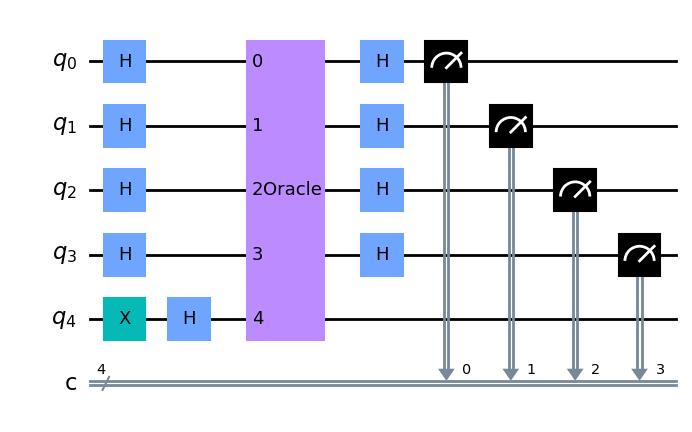

In [8]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

We can see in the above circuit the DJ Algorithm works by passing the n qubits through a number of Hadamard gates, apply the oracle, then another set of Hadamard gates.

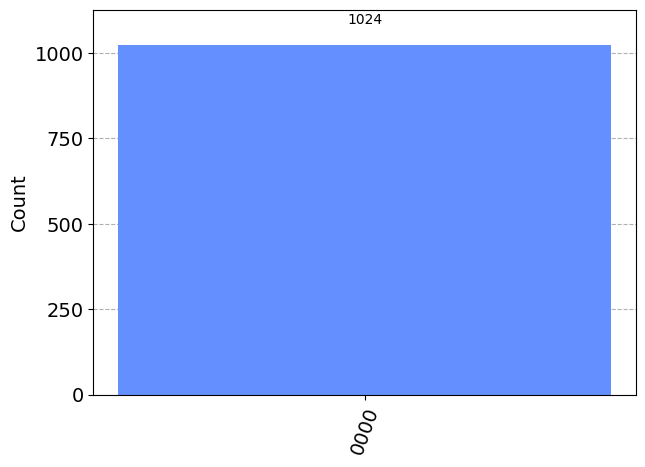

In [11]:
# Use local simulator:

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n,'constant')
results = execute(dj_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [14]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                       not x.configuration().simulator and
                                       x.status().operational==True))
print("Least busy backend: ", backend)

                     
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend = backend, shots = shots, optimization_level=3)

Least busy backend:  ibm_nairobi


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>